In [137]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas_datareader import data
import yfinance as yf


In [138]:
# Defino el período de tiempo para todas las cargas
start_date = "2000-01-01"
end_date = "2023-03-01"

# BAJAR HISTORICO DEL INDICE S&P 500

In [139]:
# Descarga de la información histórica (del 2000 a la fecha actual) del índice.
sp500 = yf.download('^GSPC', start=start_date, end=end_date, rounding=True, group_by='Date')
sp500

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.25,1478.00,1438.36,1455.22,1455.22,931800000
2000-01-04,1455.22,1455.22,1397.43,1399.42,1399.42,1009000000
2000-01-05,1399.42,1413.27,1377.68,1402.11,1402.11,1085500000
2000-01-06,1402.11,1411.90,1392.10,1403.45,1403.45,1092300000
2000-01-07,1403.45,1441.47,1400.73,1441.47,1441.47,1225200000
...,...,...,...,...,...,...
2023-02-22,4001.83,4017.37,3976.90,3991.05,3991.05,4079320000
2023-02-23,4018.60,4028.30,3969.19,4012.32,4012.32,3952940000
2023-02-24,3973.24,3978.25,3943.08,3970.04,3970.04,3877700000


In [140]:
# Resuelvo el problema del "Date" como indice
sp500.reset_index(inplace=True)
sp500

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.25,1478.00,1438.36,1455.22,1455.22,931800000
1,2000-01-04,1455.22,1455.22,1397.43,1399.42,1399.42,1009000000
2,2000-01-05,1399.42,1413.27,1377.68,1402.11,1402.11,1085500000
3,2000-01-06,1402.11,1411.90,1392.10,1403.45,1403.45,1092300000
4,2000-01-07,1403.45,1441.47,1400.73,1441.47,1441.47,1225200000
...,...,...,...,...,...,...,...
5821,2023-02-22,4001.83,4017.37,3976.90,3991.05,3991.05,4079320000
5822,2023-02-23,4018.60,4028.30,3969.19,4012.32,4012.32,3952940000
5823,2023-02-24,3973.24,3978.25,3943.08,3970.04,3970.04,3877700000
5824,2023-02-27,3992.36,4018.05,3973.55,3982.24,3982.24,3836950000


In [141]:
# Selecciono las columnas para trabajar
sp500 = sp500.loc[:, ["Date", "Adj Close", "Volume"]]
sp500

,Date,Adj Close,Volume
0,2000-01-03,1455.22,931800000
1,2000-01-04,1399.42,1009000000
2,2000-01-05,1402.11,1085500000
3,2000-01-06,1403.45,1092300000
4,2000-01-07,1441.47,1225200000
...,...,...,...
5821,2023-02-22,3991.05,4079320000
5822,2023-02-23,4012.32,3952940000
5823,2023-02-24,3970.04,3877700000
5824,2023-02-27,3982.24,3836950000


In [142]:
# Visualización de estructura de los datos.
sp500.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5826 entries, 0 to 5825
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5826 non-null   datetime64[ns]
 1   Adj Close  5826 non-null   float64       
 2   Volume     5826 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 136.7 KB


In [143]:
# Unifico el type de las columnas
sp500['Volume'] = sp500['Volume'].astype(float)

In [144]:
# Revisión de registros duplicados
print('La cantidad de registros duplicados es:', sp500.duplicated().sum())

La cantidad de registros duplicados es: 0


In [145]:
# Resumen de estadísticas descriptivas del dataset
summary = sp500.describe()
print(summary)

         Adj Close        Volume
count  5826.000000  5.826000e+03
mean   1888.145690  3.303245e+09
std     978.102537  1.522596e+09
min     676.530000  3.560700e+08
25%    1184.547500  1.986958e+09
50%    1434.790000  3.409790e+09
75%    2393.307500  4.159688e+09
max    4796.560000  1.145623e+10


In [146]:
# Grabo la información del S&P500
sp500.to_csv(r'./Datasets/df_sp500.csv', index=False)

# GRAFICO EL INDICE S&P 500

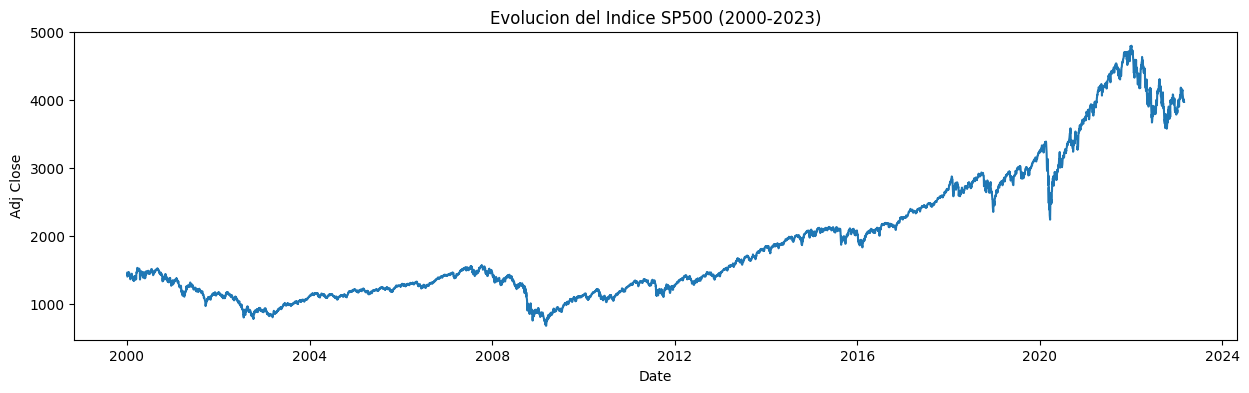

In [147]:
# Creo gráfico de líneas
plt.figure(figsize=(15, 4))
plt.plot(sp500['Date'], sp500['Adj Close'])

# Establecer el título y las etiquetas de los ejes
plt.title('Evolucion del Indice SP500 (2000-2023)')
plt.xlabel('Date')
plt.ylabel('Adj Close')

# Mostrar el gráfico
plt.show()

In [148]:
# Incorporo atributos de fechas
sp500.insert(loc=3, column='Month', value=(sp500['Date'].dt.month))
sp500.insert(loc=4, column='Year', value=(sp500['Date'].dt.year))
sp500

,Date,Adj Close,Volume,Month,Year
0,2000-01-03,1455.22,9.318000e+08,1,2000
1,2000-01-04,1399.42,1.009000e+09,1,2000
2,2000-01-05,1402.11,1.085500e+09,1,2000
3,2000-01-06,1403.45,1.092300e+09,1,2000
4,2000-01-07,1441.47,1.225200e+09,1,2000
...,...,...,...,...,...
5821,2023-02-22,3991.05,4.079320e+09,2,2023
5822,2023-02-23,4012.32,3.952940e+09,2,2023
5823,2023-02-24,3970.04,3.877700e+09,2,2023
5824,2023-02-27,3982.24,3.836950e+09,2,2023


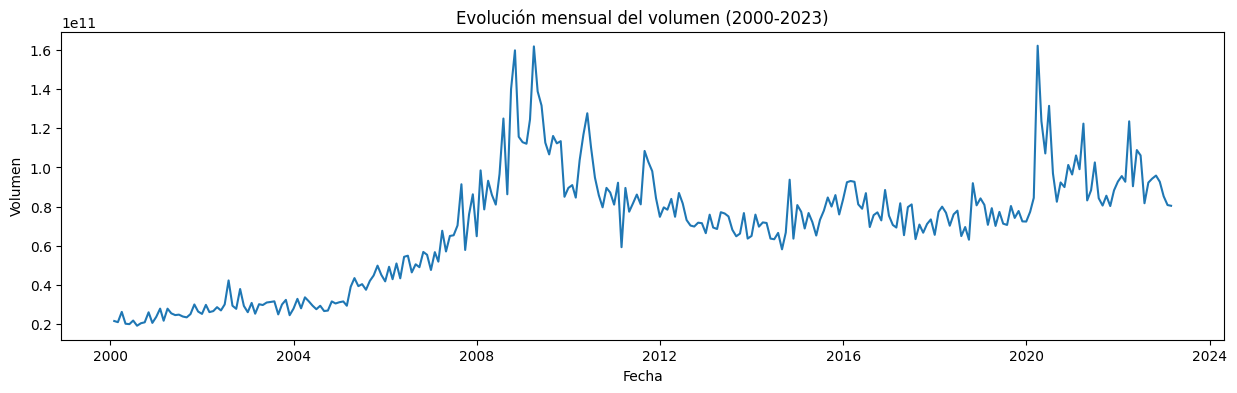

In [149]:
# Convertir la columna 'Date' a un objeto datetime
sp500['Date'] = pd.to_datetime(sp500['Date'])

# Agrupar los datos por mes y sumar el volumen
df_monthly = sp500.groupby(pd.Grouper(key='Date', freq='M')).agg({'Volume': 'sum'})

# Crear el gráfico de líneas
plt.figure(figsize=(15, 4))
plt.plot(df_monthly.index, df_monthly['Volume'])

# Establecer el título y las etiquetas de los ejes
plt.title('Evolución mensual del volumen (2000-2023)')
plt.xlabel('Fecha')
plt.ylabel('Volumen')

# Mostrar el gráfico
plt.show()

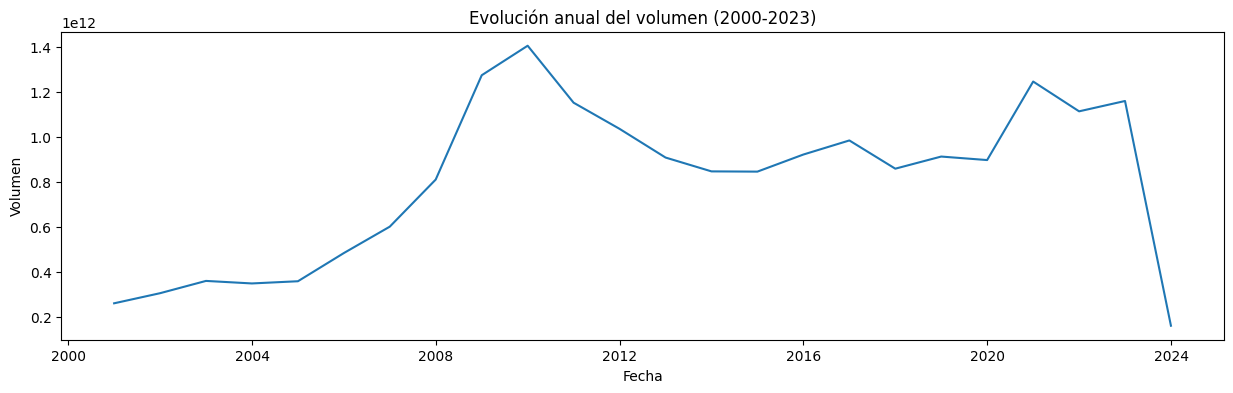

In [150]:
# Convertir la columna 'Date' a un objeto datetime
sp500['Date'] = pd.to_datetime(sp500['Date'])

# Agrupar los datos por año y sumar el volumen
df_yearly = sp500.groupby(pd.Grouper(key='Date', freq='Y')).agg({'Volume': 'sum'})

# Crear el gráfico de líneas
plt.figure(figsize=(15, 4))
plt.plot(df_yearly.index, df_yearly['Volume'])

# Establecer el título y las etiquetas de los ejes
plt.title('Evolución anual del volumen (2000-2023)')
plt.xlabel('Fecha')
plt.ylabel('Volumen')

# Mostrar el gráfico
plt.show()

# BAJAR HISTORICO DE LOS INDICES DEL S&P 500

In [151]:
# Selecciono los 11 indices del S&P500
index = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU"] 

In [152]:
# Concateno los elementos separados por espacios para adaptar a los requerimientos de la libreria
indices = " ".join(index)

In [153]:
df_index = yf.download(indices, start = start_date, end = end_date, rounding=True)

[*********************100%***********************]  11 of 11 completed


In [154]:
df_index.head()

Adj Close                                                     \
                 XLB XLC    XLE    XLF    XLI    XLK    XLP XLRE    XLU   
Date                                                                      
2000-01-03     15.33 NaN  14.68  11.64  18.90  42.12  13.17  NaN  12.09   
2000-01-04     15.18 NaN  14.40  11.13  18.38  39.98  12.80  NaN  11.72   
2000-01-05     15.81 NaN  14.78  11.04  18.30  39.39  13.03  NaN  12.02   
2000-01-06     16.22 NaN  15.35  11.53  18.54  38.08  13.27  NaN  12.00   
2000-01-07     16.21 NaN  15.52  11.72  19.25  38.75  14.11  NaN  12.10   

                   ... Volume                                                 \
              XLV  ...    XLC     XLE      XLF     XLI      XLK     XLP XLRE   
Date               ...                                                         
2000-01-03  21.49  ...    NaN  380300  1185699   82800   938100  634300  NaN   
2000-01-04  21.00  ...    NaN  722200   885705  146900   545500  172000  NaN   
2000-01-05  20.81  ...    NaN  337800   717181  129200  1906000  343600  NaN   
2000-01-06  20.88  ...    NaN  133100   415832   54000  1670000  420800  NaN   
2000-01-07  21.13  ...    NaN  468000   468149   32900   686000  337100  NaN   

                                    
               XLU     XLV     XLY  
Date                                
2000-01-03  176700  246700  212900  
2000-01-04   93500   35300  177200  
2000-01-05  273400  137600  124600  
2000-01-06   34500   50000  135800  
2000-01-07   46200   22100   70000  

[5 rows x 66 columns]

In [155]:
# Resuelvo el problema del "Date" como indice
df_index.reset_index(inplace=True)

In [156]:
# Selecciono las columnas para trabajar
df_index = df_index.loc[:, ["Date", "Adj Close", "Volume"]]
df_index

Date Adj Close                                                     \
                      XLB    XLC    XLE    XLF     XLI     XLK    XLP   XLRE   
0    2000-01-03     15.33    NaN  14.68  11.64   18.90   42.12  13.17    NaN   
1    2000-01-04     15.18    NaN  14.40  11.13   18.38   39.98  12.80    NaN   
2    2000-01-05     15.81    NaN  14.78  11.04   18.30   39.39  13.03    NaN   
3    2000-01-06     16.22    NaN  15.35  11.53   18.54   38.08  13.27    NaN   
4    2000-01-07     16.21    NaN  15.52  11.72   19.25   38.75  14.11    NaN   
...         ...       ...    ...    ...    ...     ...     ...    ...    ...   
5821 2023-02-22     80.21  54.09  82.65  35.42  100.01  136.00  72.94  38.21   
5822 2023-02-23     80.30  53.84  83.89  35.45  100.48  138.25  72.85  38.58   
5823 2023-02-24     80.84  53.09  83.79  35.48   99.90  135.79  72.36  37.86   
5824 2023-02-27     81.11  53.26  84.03  35.47  100.79  136.52  72.28  37.92   
5825 2023-02-28     81.48  53.35  82.83  35.54  100.56  136.22  71.69  37.94   

             ...     Volume                                                   \
        XLU  ...        XLC       XLE       XLF       XLI      XLK       XLP   
0     12.09  ...        NaN    380300   1185699     82800   938100    634300   
1     11.72  ...        NaN    722200    885705    146900   545500    172000   
2     12.02  ...        NaN    337800    717181    129200  1906000    343600   
3     12.00  ...        NaN    133100    415832     54000  1670000    420800   
4     12.10  ...        NaN    468000    468149     32900   686000    337100   
...     ...  ...        ...       ...       ...       ...      ...       ...   
5821  66.45  ...  4410600.0  20135200  31065200   8867100  7169200   8851000   
5822  66.10  ...  5151100.0  17511700  42357600   8995600  6560000  12700000   
5823  66.12  ...  4842300.0  18748400  48732600   9288400  7173700  11340600   
5824  65.68  ...  3659200.0  15338200  31664600   8677600  4694500  10162300   
5825  64.52  ...  5728600.0  19003800  32531400  10854200  5242900   9757300   

                                              
           XLRE       XLU       XLV      XLY  
0           NaN    176700    246700   212900  
1           NaN     93500     35300   177200  
2           NaN    273400    137600   124600  
3           NaN     34500     50000   135800  
4           NaN     46200     22100    70000  
...         ...       ...       ...      ...  
5821  7049600.0  13375100   7318900  4964200  
5822  9331700.0  10703300   9955500  5284300  
5823  8159000.0  11575200   9008000  5957300  
5824  4816100.0  10860300   6463900  5622200  
5825  4202100.0  20575900  10282800  5592500  

[5826 rows x 23 columns]

In [157]:
# Veo los datos
df_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5826 entries, 0 to 5825
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           5826 non-null   datetime64[ns]
 1   (Adj Close, XLB)   5826 non-null   float64       
 2   (Adj Close, XLC)   1182 non-null   float64       
 3   (Adj Close, XLE)   5826 non-null   float64       
 4   (Adj Close, XLF)   5826 non-null   float64       
 5   (Adj Close, XLI)   5826 non-null   float64       
 6   (Adj Close, XLK)   5826 non-null   float64       
 7   (Adj Close, XLP)   5826 non-null   float64       
 8   (Adj Close, XLRE)  1860 non-null   float64       
 9   (Adj Close, XLU)   5826 non-null   float64       
 10  (Adj Close, XLV)   5826 non-null   float64       
 11  (Adj Close, XLY)   5826 non-null   float64       
 12  (Volume, XLB)      5826 non-null   int64         
 13  (Volume, XLC)      1182 non-null   float64       
 14  (Volume,

In [158]:
# Unifico  el type de las columnas
df_index['Volume'] = df_index['Volume'].astype(float)

In [159]:
# Calculo el valor promedio de cada columna
promedios = df_index.mean()

# Reemplazo los nulos con su respectivo promedio de columna
df_index.fillna(promedios, inplace=True)

/var/folders/kg/01lphnns7wq7wxsptrz_jyc00000gq/T/ipykernel_46432/4239597860.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  promedios = df_index.mean()


In [160]:
# Resumen de estadísticas descriptivas de los datasets
summary = df_index.describe()
print(summary)

         Adj Close                                                      \
               XLB          XLC          XLE          XLF          XLI   
count  5826.000000  5826.000000  5826.000000  5826.000000  5826.000000   
mean     34.704370    57.522276    40.628163    17.668397    40.745800   
std      19.594534     5.480992    17.156567     7.488011    25.465399   
min      10.290000    37.560000    11.410000     3.860000    11.540000   
25%      18.832500    57.522276    27.602500    12.482500    20.632500   
50%      29.380000    57.522276    44.230000    15.980000    28.815000   
75%      46.270000    57.522276    52.007500    21.627500    58.660000   
max      88.460000    84.680000    92.160000    40.370000   104.790000   

                                                                        ...  \
               XLK          XLP         XLRE          XLU          XLV  ...   
count  5826.000000  5826.000000  5826.000000  5826.000000  5826.000000  ...   
mean     42.860659    

In [161]:
# Grabo el file con datos de los 11 indices
df_index.to_csv(r'./Datasets/df_index.csv', index=False)

# GRAFICO LOS INDICES DEL S&P 500

In [162]:
index_desc = {
    "XLK": "S&P Technology Select Sector Total Return",
    "XLV": "S&P Health Care Select Sector Total Return",
    "XLC": "S&P Communication Services Select Sector",
    "XLY": "S&P Consumer Discretionary Select Sector",
    "XLP": "S&P Consumer Staples Select Sector Total Return",
    "XLE": "S&P Energy Select Sector Total Return",
    "XLF": "S&P Financials Select Sector Total Return",
    "XLI": "S&P Industrial Select Sector Total Return",
    "XLB": "S&P Materials Select Sector Total Return",
    "XLRE":"S&P Real Estate Select Sector Total Return",
    "XLU": "S&P Utilities Select Sector Total Return"
}

In [163]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5826 entries, 0 to 5825
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           5826 non-null   datetime64[ns]
 1   (Adj Close, XLB)   5826 non-null   float64       
 2   (Adj Close, XLC)   5826 non-null   float64       
 3   (Adj Close, XLE)   5826 non-null   float64       
 4   (Adj Close, XLF)   5826 non-null   float64       
 5   (Adj Close, XLI)   5826 non-null   float64       
 6   (Adj Close, XLK)   5826 non-null   float64       
 7   (Adj Close, XLP)   5826 non-null   float64       
 8   (Adj Close, XLRE)  5826 non-null   float64       
 9   (Adj Close, XLU)   5826 non-null   float64       
 10  (Adj Close, XLV)   5826 non-null   float64       
 11  (Adj Close, XLY)   5826 non-null   float64       
 12  (Volume, XLB)      5826 non-null   float64       
 13  (Volume, XLC)      5826 non-null   float64       
 14  (Volume,

### --> Evolucion de precios de los indices

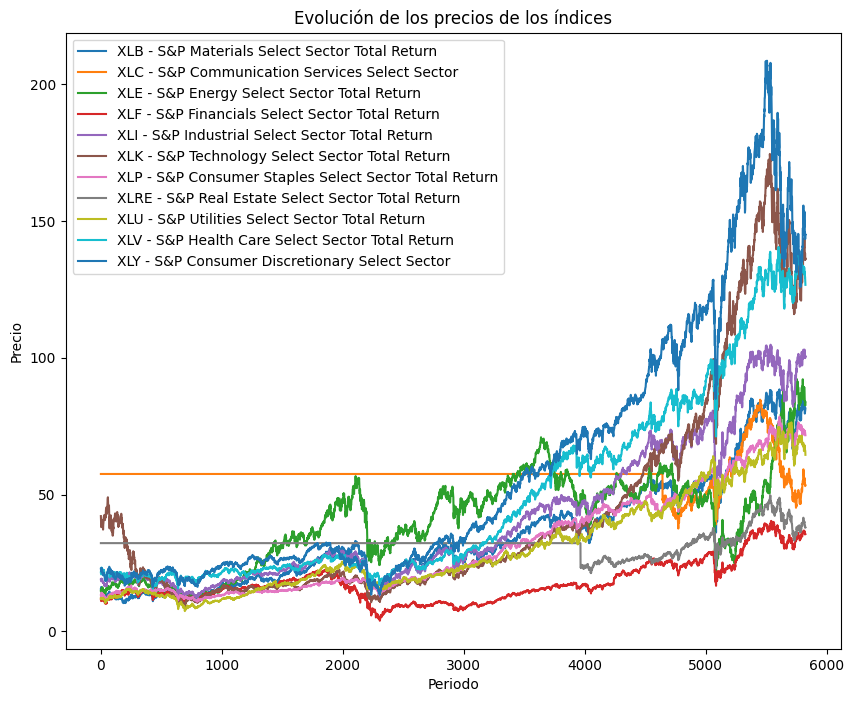

In [164]:
# Seleccionar solo la columna "Adj Close" de los índices
df_prices = df_index["Adj Close"]

# Graficar la evolución de los precios de los índices
ax = df_prices.plot(figsize=(10, 8))

# Agregar título y etiquetas de los ejes
plt.title("Evolución de los precios de los índices")
plt.xlabel("Periodo")
plt.ylabel("Precio")

# Obtener la leyenda actual
handles, labels = ax.get_legend_handles_labels()

# Agregar las descripciones de los índices a la leyenda
for i, label in enumerate(labels):
    if label in index_desc:
        labels[i] = "{} - {}".format(label, index_desc[label])

# Actualizar la leyenda
ax.legend(handles, labels)

# Mostrar el gráfico
plt.show()

### --> Evolucion de volumen de los indices

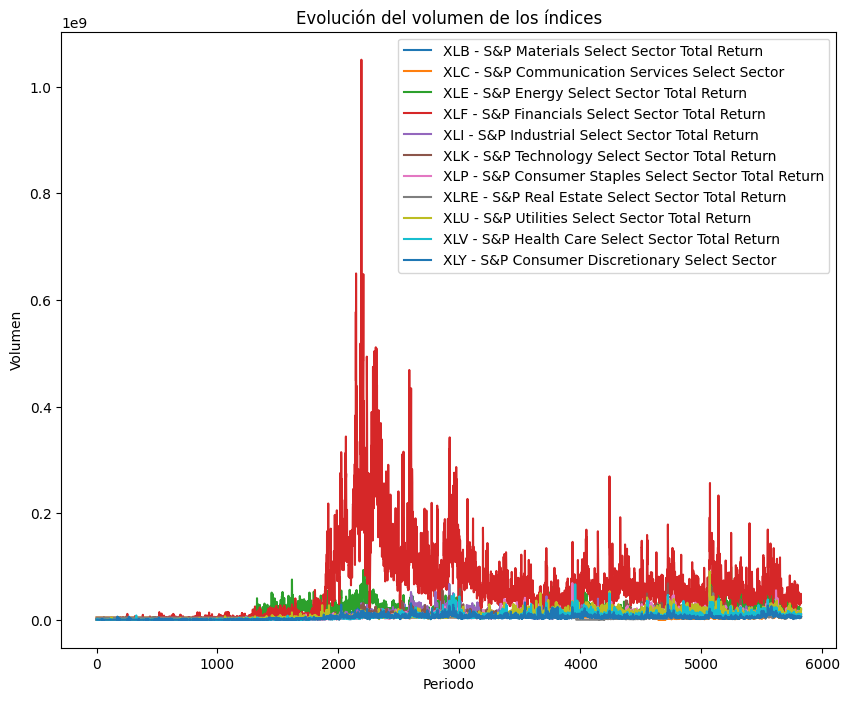

In [165]:
# Seleccionar solo la columna "Volume" de los índices
df_volume = df_index["Volume"]

# Graficar la evolución del volumen de los índices
ax = df_volume.plot(figsize=(10, 8))

# Agregar título y etiquetas de los ejes
plt.title("Evolución del volumen de los índices")
plt.xlabel("Periodo")
plt.ylabel("Volumen")

# Obtener la leyenda actual
handles, labels = ax.get_legend_handles_labels()

# Agregar las descripciones de los índices a la leyenda
for i, label in enumerate(labels):
    if label in index_desc:
        labels[i] = "{} - {}".format(label, index_desc[label])

# Actualizar la leyenda
ax.legend(handles, labels)

# Mostrar el gráfico
plt.show()


### --> Matriz de correlacion con heatmap

/var/folders/kg/01lphnns7wq7wxsptrz_jyc00000gq/T/ipykernel_46432/3757070257.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_index.corr()


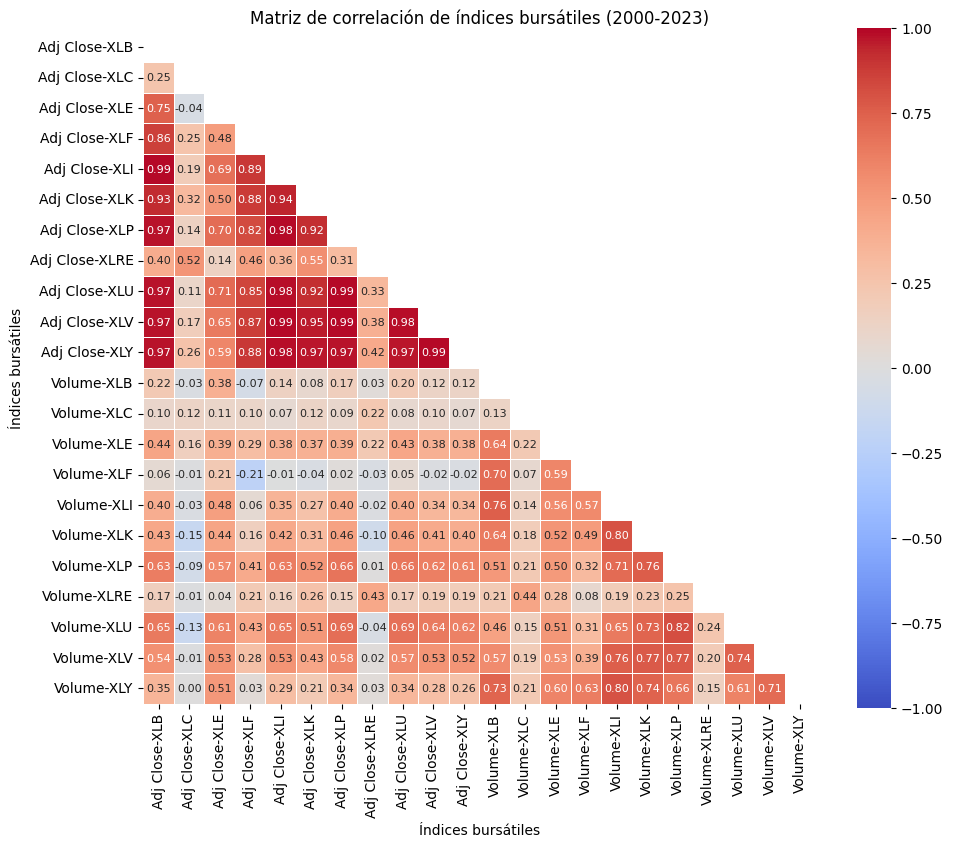

In [166]:
# Crear matriz de correlación
corr_matrix = df_index.corr()

# Crear figura y eje
fig, ax = plt.subplots(figsize=(12, 10))

# Crear heatmap con tamaño de celda ajustado
sns.heatmap(corr_matrix, ax=ax, cmap='coolwarm', annot=True, linewidths=0.5, annot_kws={'size': 8}, square=True, cbar=True, center=0, vmin=-1, vmax=1, fmt='.2f', mask=np.triu(np.ones_like(corr_matrix)))

# Añadir título y etiquetas de eje
ax.set_title('Matriz de correlación de índices bursátiles (2000-2023)')
ax.set_xlabel('Índices bursátiles')
ax.set_ylabel('Índices bursátiles')

# Ajustar separación entre celdas
plt.subplots_adjust(left=0.2, bottom=0.2)

# Mostrar el gráfico
plt.show()

### --> Analisis univariado de los indices

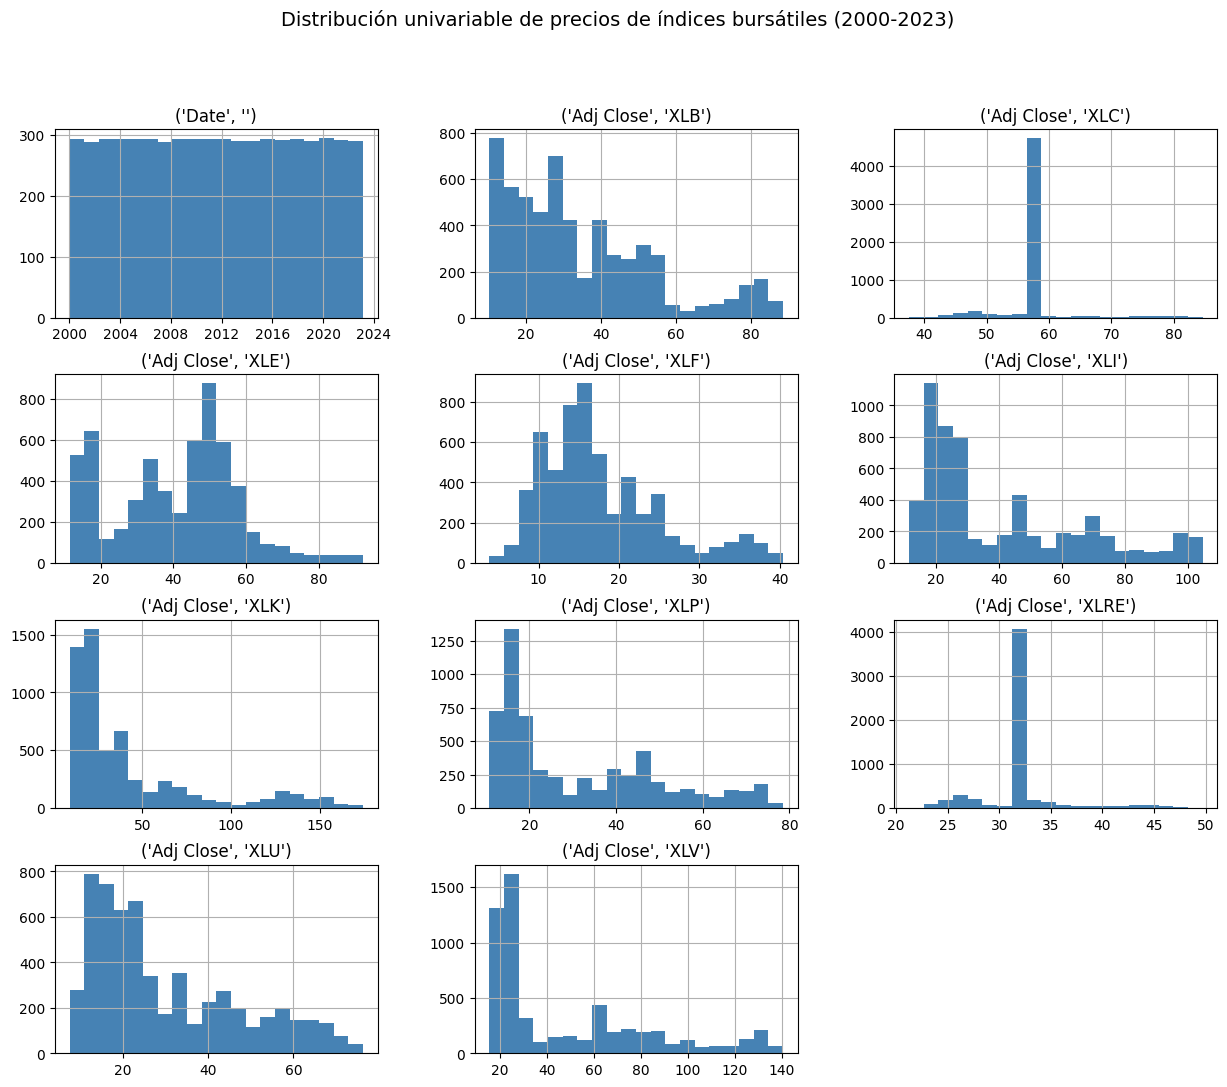

In [167]:
# Seleccionar columnas con precios de cierre de los 11 índices bursátiles
close_prices = df_index.iloc[:, 0:11]

# Crear histogramas
close_prices.hist(bins=20, figsize=(15,12), color='steelblue')

# Añadir título y etiquetas de eje
plt.suptitle('Distribución univariable de precios de índices bursátiles (2000-2023)', fontsize=14)
plt.xlabel('Precio de cierre')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

### --> Analisis bivariado de los indices

IndexError: single positional indexer is out-of-bounds

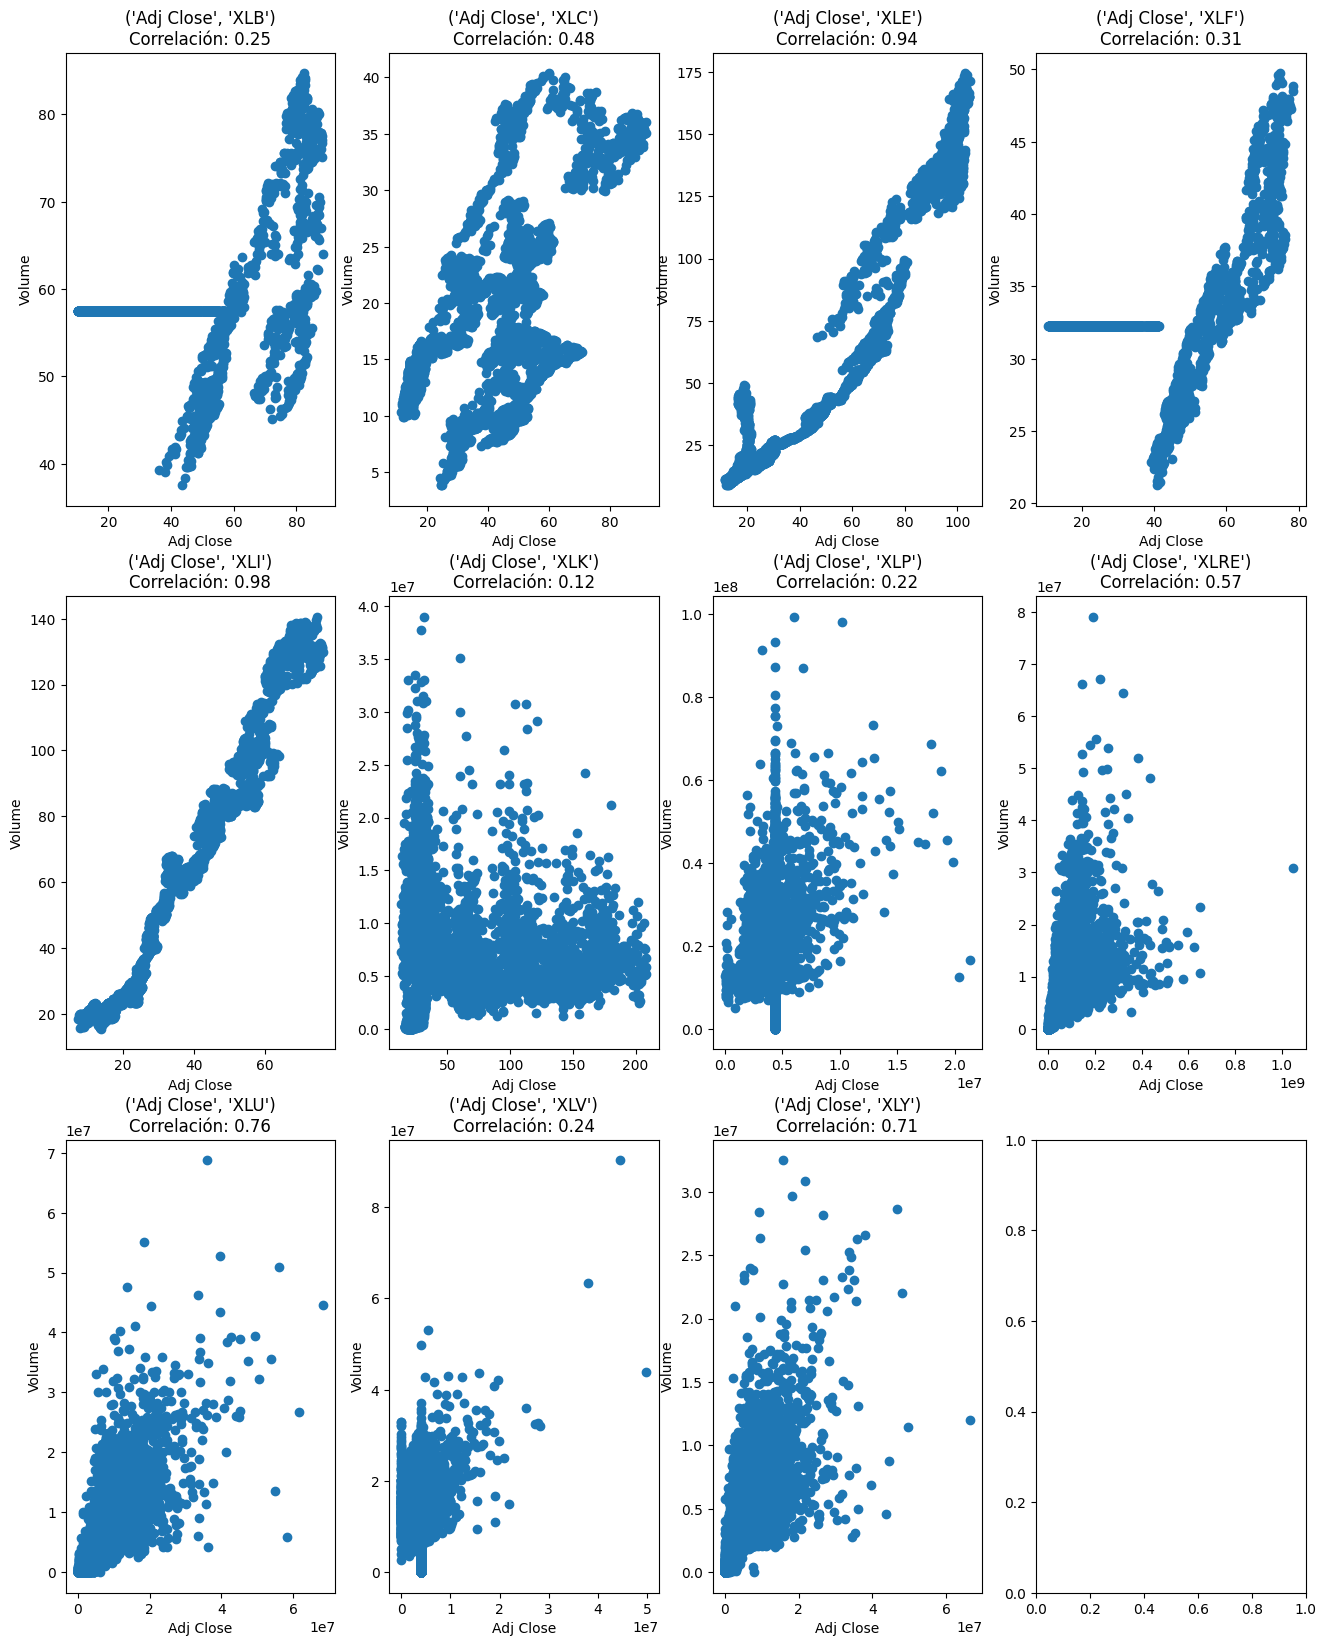

In [169]:
# Crear un gráfico de dispersión y una matriz de correlación para cada índice bursátil
fig, axs = plt.subplots(3, 4, figsize=(16, 20))
axs = axs.ravel()  # Convertir los subplots en un arreglo 1D

for i in range(len(df_index.columns[1:])):
    index_name = df_index.columns[i+1]
    adj_close = df_index.iloc[:, i*2+1]
    volume = df_index.iloc[:, i*2+2]
    corr = round(adj_close.corr(volume), 2)  # Calcular la correlación y redondear a 2 decimales
    
    axs[i].scatter(adj_close, volume)
    axs[i].set_title(f"{index_name}\nCorrelación: {corr}")
    axs[i].set_xlabel("Adj Close")
    axs[i].set_ylabel("Volume")

plt.tight_layout()
plt.show()


# BAJAR HISTORICO DE LAS EMPRESAS QUE COMPONEN
# LOS INDICES XLY, XLV y XLK

## XLY (Consumer Discretionary Select Sector SPDR Fund)

In [170]:
XLY = ['AMZN', 'HD', 'MCD', 'NKE', 'SBUX', 'DIS', 'LVS', 'TSLA', 'BKNG', 'GM', 'F', 'MAR', 'TGT', 'AZO', 'CMG', 'ROST', 'EBAY', 'DHI', 'WYNN', 'HBI', 'KSS', 'EXPE', 'DRI', 'MGM', 'CCL', 'NCLH', 'RCL', 'HOG', 'LKQ', 'FOXA', 'FOX', 'SYY', 'YUM', 'POOL', 'ORLY', 'ULTA', 'LULU', 'BWA', 'TPR', 'H', 'HAS', 'GPC', 'LEN']

In [171]:
# Concateno los elementos separados por espacios
index_cons = " ".join(XLY)

In [172]:
# Traigo las empresas
df_ix_cons = yf.download(index_cons, start = start_date, end = end_date, rounding=True)

[*********************100%***********************]  43 of 43 completed


In [173]:
# Resuelvo el problema del "Date" como indice
df_ix_cons.reset_index(inplace=True)

In [174]:
# Selecciono las columnas para trabajar
df_ix_cons = df_ix_cons.loc[:, ["Date", "Adj Close", "Volume"]]
df_ix_cons

Date Adj Close                                                  \
                     AMZN      AZO     BKNG    BWA    CCL      CMG    DHI   
0    2000-01-03      4.47    30.56   307.50   3.76  28.77      NaN   2.70   
1    2000-01-04      4.10    30.44   324.00   3.76  28.43      NaN   2.59   
2    2000-01-05      3.49    30.31   359.62   3.78  29.39      NaN   2.63   
3    2000-01-06      3.28    29.06   345.00   3.73  29.81      NaN   2.49   
4    2000-01-07      3.48    30.44   343.50   3.83  29.47      NaN   2.58   
...         ...       ...      ...      ...    ...    ...      ...    ...   
5821 2023-02-22     95.79  2567.36  2426.71  49.57  11.04  1552.38  91.14   
5822 2023-02-23     95.82  2571.46  2426.49  49.60  10.89  1522.49  92.26   
5823 2023-02-24     93.50  2540.56  2452.48  49.61  10.59  1476.73  91.16   
5824 2023-02-27     93.76  2572.25  2521.08  49.99  10.83  1494.75  91.49   
5825 2023-02-28     94.23  2486.54  2524.00  50.28  10.62  1491.08  92.48   

                      ...   Volume                                         \
         DIS     DRI  ...      RCL      ROST      SBUX      SYY       TGT   
0      23.12    6.17  ...   592200   4067200  24232000  1233200   2870400   
1      24.47    6.12  ...   330200   7012000  21564800  1054200   3856400   
2      25.48    6.34  ...   525300   6990400  28206400  1334200   4330600   
3      24.47    6.28  ...   511100  24146400  30825600  1557400   8167400   
4      24.08    6.19  ...   421900  14456000  26044800  1157400   4402600   
...      ...     ...  ...      ...       ...       ...      ...       ...   
5821  101.68  148.91  ...  2044600   3075300   7523700  1787800   2941000   
5822  101.73  148.28  ...  2066600   1875600   6857900  1673900   2718500   
5823  100.30  144.53  ...  2875100   2103500   6019700  1844200   2888800   
5824  100.45  142.67  ...  2459700   1993000   5235100  1247400   5245000   
5825   99.61  142.99  ...  3662300   3519300   5186500  2864800  10669300   

                                                            
            TPR         TSLA      ULTA       WYNN      YUM  
0           NaN          NaN       NaN        NaN  3033493  
1           NaN          NaN       NaN        NaN  3315031  
2           NaN          NaN       NaN        NaN  4642602  
3           NaN          NaN       NaN        NaN  3947658  
4           NaN          NaN       NaN        NaN  6063647  
...         ...          ...       ...        ...      ...  
5821  2094000.0  191828500.0  432500.0  3375500.0  1977100  
5822  2233800.0  146360000.0  537700.0  1820700.0  2219000  
5823  2418200.0  142228100.0  728300.0  1944200.0  1836700  
5824  2695400.0  161028300.0  445800.0  2259000.0  1963100  
5825  2615500.0  153144900.0  514100.0  3241500.0  2624700  

[5826 rows x 87 columns]

In [175]:
df_ix_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5826 entries, 0 to 5825
Data columns (total 87 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           5826 non-null   datetime64[ns]
 1   (Adj Close, AMZN)  5826 non-null   float64       
 2   (Adj Close, AZO)   5826 non-null   float64       
 3   (Adj Close, BKNG)  5826 non-null   float64       
 4   (Adj Close, BWA)   5826 non-null   float64       
 5   (Adj Close, CCL)   5826 non-null   float64       
 6   (Adj Close, CMG)   4302 non-null   float64       
 7   (Adj Close, DHI)   5826 non-null   float64       
 8   (Adj Close, DIS)   5826 non-null   float64       
 9   (Adj Close, DRI)   5826 non-null   float64       
 10  (Adj Close, EBAY)  5826 non-null   float64       
 11  (Adj Close, EXPE)  4432 non-null   float64       
 12  (Adj Close, F)     5826 non-null   float64       
 13  (Adj Close, FOX)   999 non-null    float64       
 14  (Adj Clo

In [176]:
# Unifico  el type de las columnas
df_ix_cons['Volume'] = df_ix_cons['Volume'].astype(float)

In [177]:
# Verificar nulos con isnull
nulos = df_ix_cons.isnull().sum().sum()
print("Total de valores nulos:", nulos)

Total de valores nulos: 64662


In [178]:
# Calculo el valor promedio de cada columna
promedios = df_ix_cons.mean()

# Reemplazo los nulos con su respectivo promedio de columna
df_ix_cons.fillna(promedios, inplace=True)

/var/folders/kg/01lphnns7wq7wxsptrz_jyc00000gq/T/ipykernel_46432/3452050912.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  promedios = df_ix_cons.mean()


In [179]:
# Resumen de estadísticas descriptivas de los datasets
summary = df_ix_cons.describe()
print(summary)

         Adj Close                                                      \
              AMZN          AZO         BKNG          BWA          CCL   
count  5826.000000  5826.000000  5826.000000  5826.000000  5826.000000   
mean     34.720807   508.905808   812.815242    25.725815    30.209911   
std      49.515697   560.103272   813.341538    15.687821    12.740020   
min       0.300000    21.120000     6.600000     2.930000     6.380000   
25%       2.220000    92.622500    39.222500    10.962500    20.590000   
50%       9.400000   295.645000   505.340000    28.355000    28.795000   
75%      47.440000   739.315000  1626.162500    38.225000    35.837500   
max     186.570000  2605.620000  2703.260000    59.120000    66.220000   

                                                                        ...  \
               CMG          DHI          DIS          DRI         EBAY  ...   
count  5826.000000  5826.000000  5826.000000  5826.000000  5826.000000  ...   
mean    532.583556    

In [180]:
# Grabo el file
df_ix_cons.to_csv(r'./Datasets/df_ix_cons.csv', index=False)

## XLV (Health Care Select Sector SPDR Fund)

In [181]:
XLV = ['JNJ', 'UNH', 'PFE', 'MRK', 'TMO', 'ABBV', 'BMY', 'ABT', 'AMGN', 'MDT', 'LLY', 'CVS', 'ISRG', 'GILD', 'CI', 'VRTX', 'DGX', 'HUM', 'REGN', 'BDX', 'A', 'ZBH', 'IDXX', 'MTD', 'HSIC', 'DXCM', 'WBA', 'STE', 'IQV', 'ALGN', 'SYK', 'BIIB', 'XRAY', 'BAX', 'PKI', 'MCK', 'HCA', 'TFX', 'RMD', 'CNC']

In [182]:
# Concateno los elementos separados por espacios
index_health = " ".join(XLV)

In [183]:
df_ix_health = yf.download(index_health, start = start_date, end = end_date, rounding=True)

[*********************100%***********************]  40 of 40 completed


In [184]:
# Resuelvo el problema del "Date" como indice
df_ix_health.reset_index(inplace=True)

In [185]:
# Selecciono las columnas para trabajar
df_ix_health = df_ix_health.loc[:, ["Date", "Adj Close", "Volume"]]
df_ix_health

Date Adj Close                                                 \
                        A    ABBV     ABT    ALGN    AMGN    BAX     BDX   
0    2000-01-03     44.00     NaN    9.22     NaN   46.77  10.64   17.87   
1    2000-01-04     40.64     NaN    8.96     NaN   43.19  10.40   17.40   
2    2000-01-05     38.12     NaN    8.94     NaN   44.68  10.86   17.53   
3    2000-01-06     36.67     NaN    9.25     NaN   45.42  11.08   18.25   
4    2000-01-07     39.72     NaN    9.35     NaN   50.53  11.71   19.27   
...         ...       ...     ...     ...     ...     ...    ...     ...   
5821 2023-02-22    142.08  150.67  102.69  302.72  236.16  40.72  239.47   
5822 2023-02-23    143.20  152.07  102.55  305.46  237.62  40.51  238.79   
5823 2023-02-24    141.20  152.71  100.46  306.28  233.66  40.16  237.00   
5824 2023-02-27    142.18  154.28   99.77  304.64  234.45  39.82  235.97   
5825 2023-02-28    141.97  153.90  101.72  309.50  231.66  39.95  233.64   

                     ...   Volume                                     \
        BIIB    BMY  ...      RMD      STE      SYK     TFX      TMO   
0      31.08  26.56  ...   770400   383100  1078000  172200   432200   
1      28.98  24.55  ...   620800   321700  1140800  138700   568400   
2      31.00  24.39  ...   845600   327600  1239200  167400   490800   
3      32.38  24.73  ...   265600   663900  1438400  240400   561900   
4      36.10  28.35  ...  1012800   313000  3115200  161100   266600   
...      ...    ...  ...      ...      ...      ...     ...      ...   
5821  272.55  71.31  ...   657900   621700  1086400  403100  1705300   
5822  271.95  71.40  ...   756700   510900  1036700  676500  1160200   
5823  270.02  70.18  ...   544500   355000  1603900  666600   852600   
5824  269.20  69.99  ...   426600   430300   787800  402100  1110600   
5825  269.86  68.96  ...  1221700  1010600  1321700  574800  1188800   

                                                      
           UNH     VRTX      WBA     XRAY        ZBH  
0      3431200  1010000  2095900   582300        NaN  
1      5997600   265400  1709100   317700        NaN  
2     10562400   202000  2167800  1188000        NaN  
3     15300000   270600  2595400   534300        NaN  
4     16160800   813200  3629900  1401000        NaN  
...        ...      ...      ...      ...        ...  
5821   2982800  1010800  4007500  1195900  1260100.0  
5822   2511800   750700  4492300  1434600   993600.0  
5823   2940400  1085100  4067100  2353800   878300.0  
5824   3006200   856100  5580100  1800800  1180100.0  
5825   3902100  1510500  8847000  5997300  1341800.0  

[5826 rows x 81 columns]

In [186]:
df_ix_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5826 entries, 0 to 5825
Data columns (total 81 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           5826 non-null   datetime64[ns]
 1   (Adj Close, A)     5826 non-null   float64       
 2   (Adj Close, ABBV)  2557 non-null   float64       
 3   (Adj Close, ABT)   5826 non-null   float64       
 4   (Adj Close, ALGN)  5555 non-null   float64       
 5   (Adj Close, AMGN)  5826 non-null   float64       
 6   (Adj Close, BAX)   5826 non-null   float64       
 7   (Adj Close, BDX)   5826 non-null   float64       
 8   (Adj Close, BIIB)  5826 non-null   float64       
 9   (Adj Close, BMY)   5826 non-null   float64       
 10  (Adj Close, CI)    5826 non-null   float64       
 11  (Adj Close, CNC)   5338 non-null   float64       
 12  (Adj Close, CVS)   5826 non-null   float64       
 13  (Adj Close, DGX)   5826 non-null   float64       
 14  (Adj Clo

In [187]:
# Unifico el type de las columnas
df_ix_health['Volume'] = df_ix_health['Volume'].astype(float)

In [188]:
# Verificar nulos con isnull
nulos = df_ix_health.isnull().sum().sum()
print("Total de valores nulos:", nulos)

Total de valores nulos: 24064


In [189]:
# Calculo el valor promedio de cada columna
promedios = df_ix_health.mean()

# Reemplazo los nulos con su respectivo promedio de columna
df_ix_health.fillna(promedios, inplace=True)

/var/folders/kg/01lphnns7wq7wxsptrz_jyc00000gq/T/ipykernel_46432/998469707.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  promedios = df_ix_health.mean()


In [190]:
# Resumen de estadísticas descriptivas de los datasets
summary = df_ix_health.describe()
print(summary)

         Adj Close                                                      \
                 A         ABBV          ABT         ALGN         AMGN   
count  5826.000000  5826.000000  5826.000000  5826.000000  5826.000000   
mean     43.470769    70.461772    37.381794   108.031896    95.948048   
std      37.193624    23.335224    32.408321   154.830061    67.225769   
min       6.630000    22.180000     7.840000     1.300000    23.090000   
25%      19.542500    70.461772    14.722500    12.750000    43.250000   
50%      27.970000    70.461772    20.010000    31.015000    54.170000   
75%      57.492500    70.461772    43.482500   138.152500   143.332500   
max     177.650000   168.540000   138.500000   729.920000   287.850000   

                                                                        ...  \
               BAX          BDX         BIIB          BMY           CI  ...   
count  5826.000000  5826.000000  5826.000000  5826.000000  5826.000000  ...   
mean     34.946440   1

In [191]:
# Grabo el file
df_ix_health.to_csv(r'./Datasets/df_ix_health.csv', index=False)

## XLK (Technology Select Sector SPDR Fund)

In [192]:
XLK = ['AAPL', 'MSFT', 'NVDA', 'V', 'MA', 'INTC', 'CSCO', 'ADBE', 'CRM', 'ORCL', 'AVGO', 'ACN', 'IBM', 'TXN', 'QCOM', 'NOW', 'MU', 'FIS', 'ADI', 'AMD', 'ADI', 'INTU', 'ADSK', 'LRCX', 'AMAT', 'TEL', 'APH', 'CTSH', 'SNPS', 'ANSS', 'FLT', 'HPQ', 'MSCI', 'CDNS', 'GPN', 'KEYS', 'PAYC', 'FTNT', 'SWKS', 'MCHP', 'VRSN']

In [193]:
# Concateno los elementos separados por espacios
index_tech = " ".join(XLK)

In [194]:
df_ix_tech = yf.download(index_tech, start = start_date, end = end_date, rounding=True)

[*********************100%***********************]  40 of 40 completed


In [195]:
# Resuelvo el problema del "Date" como indice
df_ix_tech.reset_index(inplace=True)

In [196]:
# Selecciono las columnas para trabajar
df_ix_tech = df_ix_tech.loc[:, ["Date", "Adj Close", "Volume"]]
df_ix_tech

Date Adj Close                                                 \
                     AAPL     ACN    ADBE     ADI    ADSK    AMAT    AMD   
0    2000-01-03      0.85     NaN   16.27   28.98    8.05   23.48  15.50   
1    2000-01-04      0.78     NaN   14.91   27.52    7.66   22.32  14.62   
2    2000-01-05      0.79     NaN   15.20   27.92    7.18   21.48  15.00   
3    2000-01-06      0.72     NaN   15.33   27.15    6.74   21.52  16.00   
4    2000-01-07      0.76     NaN   16.07   27.92    7.54   21.70  16.25   
...         ...       ...     ...     ...     ...     ...     ...    ...   
5821 2023-02-22    148.91  269.63  348.72  182.91  216.70  110.41  76.61   
5822 2023-02-23    149.40  271.23  347.02  184.79  221.16  112.91  79.75   
5823 2023-02-24    146.71  266.53  320.54  182.94  192.53  111.31  78.09   
5824 2023-02-27    147.92  266.25  322.32  183.17  196.68  112.07  78.77   
5825 2023-02-28    147.41  265.55  323.95  183.47  198.69  116.15  78.58   

                     ...     Volume                                          \
        ANSS    APH  ...       NVDA       ORCL      PAYC      QCOM     SNPS   
0       2.77   1.87  ...   30091200   98114800       NaN  91334000  2315600   
1       2.69   1.80  ...   30048000  116824800       NaN  63567400  1291000   
2       2.70   1.76  ...   18835200  166054000       NaN  93778400  3343800   
3       2.70   1.72  ...   12048000  109880000       NaN  58782600  3107400   
4       2.70   1.73  ...    7118400   91755600       NaN  68198600  1710800   
...      ...    ...  ...        ...        ...       ...       ...      ...   
5821  266.78  76.98  ...   51318400    5840100  492400.0   5517800   942300   
5822  294.75  77.43  ...  111799500    8637100  238700.0   6440200  1203400   
5823  291.34  76.31  ...   58971600    7659200  313300.0   7357200   895400   
5824  295.68  76.75  ...   45299400    6748800  480900.0   7787200  1040500   
5825  303.61  77.31  ...   45596300    7468000  654000.0   6491800   882500   

                                                        
         SWKS        TEL       TXN          V     VRSN  
0      512000        NaN  10815600        NaN  2270100  
1      292600        NaN   7952400        NaN  3002200  
2      411800        NaN  12142400        NaN  6886600  
3      385400        NaN  11758400        NaN  4003200  
4      536000        NaN  12938800        NaN  3803200  
...       ...        ...       ...        ...      ...  
5821  2349900  1292800.0   4577400  4621800.0   685900  
5822  1930100  1488100.0   4856600  5533800.0   519500  
5823  1890200  1789000.0   4118300  4414400.0   640800  
5824  1178600  1612500.0   3310100  4255300.0   405500  
5825  1220000  1735700.0   3674500  5385400.0   631100  

[5826 rows x 81 columns]

In [197]:
df_ix_tech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5826 entries, 0 to 5825
Data columns (total 81 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           5826 non-null   datetime64[ns]
 1   (Adj Close, AAPL)  5826 non-null   float64       
 2   (Adj Close, ACN)   5437 non-null   float64       
 3   (Adj Close, ADBE)  5826 non-null   float64       
 4   (Adj Close, ADI)   5826 non-null   float64       
 5   (Adj Close, ADSK)  5826 non-null   float64       
 6   (Adj Close, AMAT)  5826 non-null   float64       
 7   (Adj Close, AMD)   5826 non-null   float64       
 8   (Adj Close, ANSS)  5826 non-null   float64       
 9   (Adj Close, APH)   5826 non-null   float64       
 10  (Adj Close, AVGO)  3414 non-null   float64       
 11  (Adj Close, CDNS)  5826 non-null   float64       
 12  (Adj Close, CRM)   4704 non-null   float64       
 13  (Adj Close, CSCO)  5826 non-null   float64       
 14  (Adj Clo

In [198]:
# Unifico el type de las columnas
df_ix_tech['Volume'] = df_ix_tech['Volume'].astype(float)

In [199]:
# Verificar nulos con isnull
nulos = df_ix_tech.isnull().sum().sum()
print("Total de valores nulos:", nulos)

Total de valores nulos: 55540


In [200]:
# Calculo el valor promedio de cada columna
promedios = df_ix_tech.mean()

# Reemplazo los nulos con su respectivo promedio de columna
df_ix_tech.fillna(promedios, inplace=True)

/var/folders/kg/01lphnns7wq7wxsptrz_jyc00000gq/T/ipykernel_46432/1932773848.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  promedios = df_ix_tech.mean()


In [201]:
# Resumen de estadísticas descriptivas de los datasets
summary = df_ix_tech.describe()
print(summary)

         Adj Close                                                     \
              AAPL         ACN         ADBE          ADI         ADSK   
count  5826.000000  5826.00000  5826.000000  5826.000000  5826.000000   
mean     29.492101    88.59556   118.781044    53.090005    72.769075   
std      43.832834    85.92572   153.138892    43.056335    77.701937   
min       0.200000     8.64000     8.320000    11.150000     4.830000   
25%       1.630000    24.20500    28.452500    23.820000    24.232500   
50%      11.350000    60.51500    39.175000    31.560000    40.190000   
75%      34.192500   112.74250   136.395000    71.182500    95.860000   
max     180.680000   408.16000   688.370000   195.270000   342.270000   

                                                                        ...  \
              AMAT          AMD         ANSS          APH         AVGO  ...   
count  5826.000000  5826.000000  5826.000000  5826.000000  5826.000000  ...   
mean     30.066910    22.433471 

In [202]:
# Grabo el file
df_ix_tech.to_csv(r'./Datasets/df_ix_tech.csv', index=False)